In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.8 MB/s eta 0:10:34tcmalloc: large alloc 1147494400 bytes == 0x56500a0ba000 @  0x7fec89d1c615 0x564fcff243bc 0x564fd000518a 0x564fcff271cd 0x564fd0019b3d 0x564fcff9b458 0x564fcff9602f 0x564fcff28aba 0x564fcff9b2c0 0x564fcff9602f 0x564fcff28aba 0x564fcff97cd4 0x564fd001a986 0x564fcff97350 0x564fd001a986 0x564fcff97350 0x564fd001a986 0x564fcff97350 0x564fcff28f19 0x564fcff6ca79 0x564fcff27b32 0x564fcff9b1dd 0x564fcff9602f 0x564fcff28aba 0x564fcff97cd4 0x564fcff9602f 0x564fcff28aba 0x564fcff96eae 0x564fcff289da 0x564fcff97108 0x564fcff9602f
     |█████████████████               | 1055.7 MB 1.4 MB/s eta 0:11:02tcmalloc: large alloc 1434370048 bytes == 0x56504e710000 @  0x7fec89d1c615 0x564fcff243bc 0x564fd000518a 0x564fcff271cd 0x564fd0019b3d 0x564fcff9b458 0x564fcff9602f 0x564fcff28aba 0x564fcff9b2c0 0x564fcff9602f 0x564fcff28aba 0x564fcff97cd4 0x564fd001a986 0x564fcff973

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
data=pd.read_csv('/content/IMDB.csv')

In [ ]:
data

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...
194,I watched mask in the 80's and it's currently ...
195,Phantasm ....Class. Phantasm II.....awesome. P...
196,Ludicrous. Angelic 9-year-old Annakin turns in...
197,"Scotty (Grant Cramer, who would go on to star ..."


In [ ]:
data['sentiment'] = data['review'].apply(lambda x: sentiment_score(x[:512]))

In [ ]:
data['sentiment']

0      2
1      5
2      4
3      3
4      4
      ..
194    1
195    2
196    2
197    3
198    3
Name: sentiment, Length: 199, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

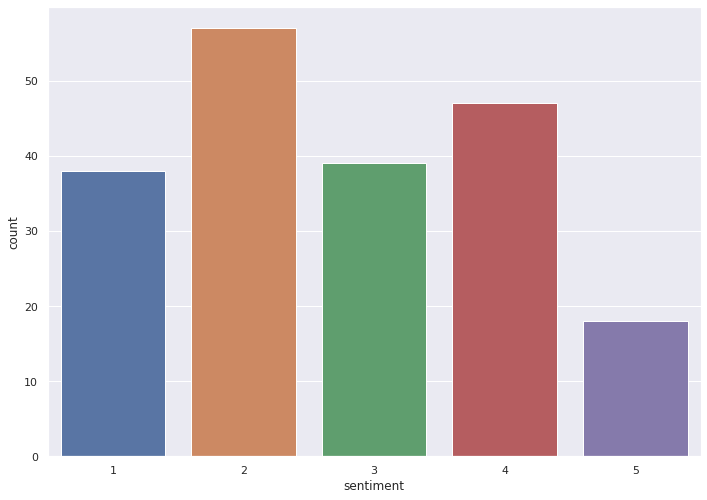

In [ ]:
sns.countplot(x='sentiment',data=data)